In [1]:
#Importing

import pandas as pd
import numpy as np

In [2]:
# Reading the dataset

df = pd.read_csv("healthcare_reviews.csv")

In [3]:
df

,Review_Text,Rating
0,I have mixed feelings about my experience.,4
1,The staff was caring and attentive. I couldn't...,5
2,I have mixed feelings about my experience.,5
3,I have mixed feelings about my experience.,5
4,The healthcare provider was excellent. I had a...,3
...,...,...
995,My experience was terrible. I would not recomm...,5
996,The service was disappointing. I won't be comi...,4
997,"The service was okay, but nothing exceptional.",3
998,I have mixed feelings about my experience.,5


In [4]:
df.shape

(1000, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Review_Text  900 non-null    object
 1   Rating       1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [6]:
df.describe()

,Rating
count,1000.000000
mean,3.058000
std,1.425015
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


In [7]:
print(df.duplicated())

0      False
1      False
2      False
3       True
4      False
       ...  
995     True
996     True
997     True
998     True
999     True
Length: 1000, dtype: bool


## Data Pre-Processing

In [8]:
#check for null values 

df.isnull().sum()

Review_Text    100
Rating           0
dtype: int64

In [9]:
#Identified 100 null values in given dataset 

#replacing null values with text 'no review available'

df['Review_Text'] = df['Review_Text'].fillna('No review available')

In [10]:
# After replacing checking the null values

df.isnull().sum()

Review_Text    0
Rating         0
dtype: int64

 Text preprocessing 

In [11]:
# Converting review text to lowercase

df['Review_Text'] = df['Review_Text'].str.lower()
df['Review_Text']

0            i have mixed feelings about my experience. 
1      the staff was caring and attentive. i couldn't...
2            i have mixed feelings about my experience. 
3            i have mixed feelings about my experience. 
4      the healthcare provider was excellent. i had a...
                             ...                        
995    my experience was terrible. i would not recomm...
996    the service was disappointing. i won't be comi...
997      the service was okay, but nothing exceptional. 
998          i have mixed feelings about my experience. 
999    the staff was caring and attentive. i couldn't...
Name: Review_Text, Length: 1000, dtype: object

In [12]:
# Removing special characters, punctuations and numbers

import re

df['Review_Text'] = df['Review_Text'].apply(lambda x: re.sub('[^A-Za-z\s]', '', x))
df['Review_Text']

0             i have mixed feelings about my experience 
1      the staff was caring and attentive i couldnt b...
2             i have mixed feelings about my experience 
3             i have mixed feelings about my experience 
4      the healthcare provider was excellent i had a ...
                             ...                        
995    my experience was terrible i would not recomme...
996    the service was disappointing i wont be coming...
997        the service was okay but nothing exceptional 
998           i have mixed feelings about my experience 
999    the staff was caring and attentive i couldnt b...
Name: Review_Text, Length: 1000, dtype: object

In [13]:
#Tokenization 

import nltk
# nltk.download('punkt')
from nltk.tokenize import word_tokenize

# Assuming df['Review_Text'] contains lists and convert them to strings

df['Review_Text'] = df['Review_Text'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

# apply for word_tokenize

df['Review_Text'] = df['Review_Text'].apply(word_tokenize)
df['Review_Text'] 


0      [i, have, mixed, feelings, about, my, experience]
1      [the, staff, was, caring, and, attentive, i, c...
2      [i, have, mixed, feelings, about, my, experience]
3      [i, have, mixed, feelings, about, my, experience]
4      [the, healthcare, provider, was, excellent, i,...
                             ...                        
995    [my, experience, was, terrible, i, would, not,...
996    [the, service, was, disappointing, i, wont, be...
997    [the, service, was, okay, but, nothing, except...
998    [i, have, mixed, feelings, about, my, experience]
999    [the, staff, was, caring, and, attentive, i, c...
Name: Review_Text, Length: 1000, dtype: object

In [14]:
#stop words removal

from nltk.corpus import stopwords

stop_words = set(stopwords.words("english"))
df['Review_Text'] = df['Review_Text'].apply(lambda x: [word for word in x if word not in stop_words])
df['Review_Text'].head()

0                        [mixed, feelings, experience]
1         [staff, caring, attentive, couldnt, happier]
2                        [mixed, feelings, experience]
3                        [mixed, feelings, experience]
4    [healthcare, provider, excellent, great, exper...
Name: Review_Text, dtype: object

In [15]:
#Lemmatization

#nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
df['Review_Text_lemma'] = df['Review_Text'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
print(df['Review_Text_lemma'].head())

0                         [mixed, feeling, experience]
1         [staff, caring, attentive, couldnt, happier]
2                         [mixed, feeling, experience]
3                         [mixed, feeling, experience]
4    [healthcare, provider, excellent, great, exper...
Name: Review_Text_lemma, dtype: object


In [16]:
#Stemming

from nltk.stem import PorterStemmer

ps = PorterStemmer()
df['Review_Text_stem'] = df['Review_Text_lemma'].apply(lambda x: [ps.stem(word) for word in x])
print(df['Review_Text_stem'].head())

0                          [mix, feel, experi]
1      [staff, care, attent, couldnt, happier]
2                          [mix, feel, experi]
3                          [mix, feel, experi]
4    [healthcar, provid, excel, great, experi]
Name: Review_Text_stem, dtype: object


In [17]:
# Convert List to String - Lemmatized column
df['Cleaned_Reviews'] = df['Review_Text_lemma'].apply(" ".join)
df['Cleaned_Reviews']

0                            mixed feeling experience
1              staff caring attentive couldnt happier
2                            mixed feeling experience
3                            mixed feeling experience
4      healthcare provider excellent great experience
                            ...                      
995      experience terrible would recommend provider
996            service disappointing wont coming back
997                  service okay nothing exceptional
998                          mixed feeling experience
999            staff caring attentive couldnt happier
Name: Cleaned_Reviews, Length: 1000, dtype: object

In [18]:
df.head()

,Review_Text,Rating,Review_Text_lemma,Review_Text_stem,Cleaned_Reviews
0,"[mixed, feelings, experience]",4,"[mixed, feeling, experience]","[mix, feel, experi]",mixed feeling experience
1,"[staff, caring, attentive, couldnt, happier]",5,"[staff, caring, attentive, couldnt, happier]","[staff, care, attent, couldnt, happier]",staff caring attentive couldnt happier
2,"[mixed, feelings, experience]",5,"[mixed, feeling, experience]","[mix, feel, experi]",mixed feeling experience
3,"[mixed, feelings, experience]",5,"[mixed, feeling, experience]","[mix, feel, experi]",mixed feeling experience
4,"[healthcare, provider, excellent, great, exper...",3,"[healthcare, provider, excellent, great, exper...","[healthcar, provid, excel, great, experi]",healthcare provider excellent great experience


In [19]:
#pos-tagging

# nltk.download('averaged_perceptron_tagger')

from nltk import pos_tag

df['Review_Text_postag'] = df['Review_Text'].apply(nltk.pos_tag)
df['Review_Text_postag']

0       [(mixed, JJ), (feelings, NNS), (experience, NN)]
1      [(staff, NN), (caring, VBG), (attentive, JJ), ...
2       [(mixed, JJ), (feelings, NNS), (experience, NN)]
3       [(mixed, JJ), (feelings, NNS), (experience, NN)]
4      [(healthcare, NN), (provider, NN), (excellent,...
                             ...                        
995    [(experience, NN), (terrible, NN), (would, MD)...
996    [(service, NN), (disappointing, VBG), (wont, N...
997    [(service, NN), (okay, MD), (nothing, NN), (ex...
998     [(mixed, JJ), (feelings, NNS), (experience, NN)]
999    [(staff, NN), (caring, VBG), (attentive, JJ), ...
Name: Review_Text_postag, Length: 1000, dtype: object

In [20]:
#Assigning Polarity 

# Applying polarity to column 'Review_Text_lemma' for positive , negative , netural review 

from textblob import TextBlob


df['Sentiment_Polarity'] = df['Review_Text_lemma'].apply(lambda x: TextBlob(' '.join(x)).sentiment.polarity)
df['Sentiment_Polarity'].head(25)

0     0.000000
1     0.400000
2     0.000000
3     0.000000
4     0.900000
5     0.400000
6     0.400000
7    -0.350000
8     0.000000
9     0.000000
10    0.583333
11    0.583333
12    0.900000
13    0.583333
14   -0.350000
15    0.400000
16   -0.350000
17   -1.000000
18   -0.350000
19   -0.300000
20    0.400000
21    0.330000
22   -0.300000
23   -1.000000
24    0.900000
Name: Sentiment_Polarity, dtype: float64

In [21]:
# Categorize sentimental into positive, negative , neutral

def categorize_sentiment(polarity):
    if polarity > 0:
        return 1
    elif polarity == 0:
        return 0
    else:
        return -1

# Applying the mapping function to create a new column 'Sentiment_Category'

df['Sentiment_Category'] = df['Sentiment_Polarity'].apply(categorize_sentiment)
df['Sentiment_Category'].head(20)

0     0
1     1
2     0
3     0
4     1
5     1
6     1
7    -1
8     0
9     0
10    1
11    1
12    1
13    1
14   -1
15    1
16   -1
17   -1
18   -1
19   -1
Name: Sentiment_Category, dtype: int64

In [22]:
df

,Review_Text,Rating,Review_Text_lemma,Review_Text_stem,Cleaned_Reviews,Review_Text_postag,Sentiment_Polarity,Sentiment_Category
0,"[mixed, feelings, experience]",4,"[mixed, feeling, experience]","[mix, feel, experi]",mixed feeling experience,"[(mixed, JJ), (feelings, NNS), (experience, NN)]",0.000000,0
1,"[staff, caring, attentive, couldnt, happier]",5,"[staff, caring, attentive, couldnt, happier]","[staff, care, attent, couldnt, happier]",staff caring attentive couldnt happier,"[(staff, NN), (caring, VBG), (attentive, JJ), ...",0.400000,1
2,"[mixed, feelings, experience]",5,"[mixed, feeling, experience]","[mix, feel, experi]",mixed feeling experience,"[(mixed, JJ), (feelings, NNS), (experience, NN)]",0.000000,0
3,"[mixed, feelings, experience]",5,"[mixed, feeling, experience]","[mix, feel, experi]",mixed feeling experience,"[(mixed, JJ), (feelings, NNS), (experience, NN)]",0.000000,0
4,"[healthcare, provider, excellent, great, exper...",3,"[healthcare, provider, excellent, great, exper...","[healthcar, provid, excel, great, experi]",healthcare provider excellent great experience,"[(healthcare, NN), (provider, NN), (excellent,...",0.900000,1
...,...,...,...,...,...,...,...,...
995,"[experience, terrible, would, recommend, provi...",5,"[experience, terrible, would, recommend, provi...","[experi, terribl, would, recommend, provid]",experience terrible would recommend provider,"[(experience, NN), (terrible, NN), (would, MD)...",-1.000000,-1
996,"[service, disappointing, wont, coming, back]",4,"[service, disappointing, wont, coming, back]","[servic, disappoint, wont, come, back]",service disappointing wont coming back,"[(service, NN), (disappointing, VBG), (wont, N...",-0.300000,-1
997,"[service, okay, nothing, exceptional]",3,"[service, okay, nothing, exceptional]","[servic, okay, noth, except]",service okay nothing exceptional,"[(service, NN), (okay, MD), (nothing, NN), (ex...",0.583333,1
998,"[mixed, feelings, experience]",5,"[mixed, feeling, experience]","[mix, feel, experi]",mixed feeling experience,"[(mixed, JJ), (feelings, NNS), (experience, NN)]",0.000000,0


In [23]:
df['Sentiment_Category'].value_counts()

Sentiment_Category
 1    515
-1    387
 0     98
Name: count, dtype: int64

In [24]:
# In 'Sentiment' feature, the 'Neutral' count difference is very low. So we need to do oversampling to reduce the difference

In [25]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [26]:
#'Review_Text_stem' is the preprocessed text and 'Sentiment_Category' is the target label

X = df['Review_Text_lemma'].apply(' '.join)
y = df['Sentiment_Category']

In [27]:
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=100)

In [28]:
# Text vectorization using TF-IDF

tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Adjust max_features as needed
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [29]:
# Apply SMOTE to the training data

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_tfidf, y_train)

In [30]:
resampled_df = pd.DataFrame({'Review_Text_lemma': X_resampled, 'Sentiment_Category': y_resampled})
resampled_df.shape

(1236, 2)

In [31]:
#Checking the size of the resampled dataset

print("Original  dataset size:", X.shape[0])
print("Resampled dataset size:", X_resampled.shape[0])

Original  dataset size: 1000
Resampled dataset size: 1236


In [32]:
resampled_df.head()

,Review_Text_lemma,Sentiment_Category
0,"(0, 16)\t0.447213595499958\n (0, 8)\t0.4472...",1
1,"(0, 25)\t0.350267469332514\n (0, 27)\t0.517...",-1
2,"(0, 4)\t0.47455587422568274\n (0, 7)\t0.474...",-1
3,"(0, 5)\t0.4056031742963533\n (0, 14)\t0.505...",-1
4,"(0, 25)\t0.350267469332514\n (0, 27)\t0.517...",-1


In [33]:
resampled_df['Sentiment_Category'].value_counts()

Sentiment_Category
 1    412
-1    412
 0    412
Name: count, dtype: int64

Model Building - Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#Logistic Regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_resampled, y_resampled)


LogisticRegression()

In [36]:
# Predictions on the training set

y_train_pred = logreg_model.predict(X_resampled)

# Evaluate the model on training data

accuracy_train = accuracy_score(y_resampled, y_train_pred)
print(f"Training Accuracy: {accuracy_train:.2f}")

print("\nClassification Report on Training data:")
print(classification_report(y_resampled, y_train_pred))

print("\nConfusion Matrix on Training data:")
print(confusion_matrix(y_resampled, y_train_pred))

Training Accuracy: 1.00

Classification Report on Training data:
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       412
           0       1.00      1.00      1.00       412
           1       1.00      1.00      1.00       412

    accuracy                           1.00      1236
   macro avg       1.00      1.00      1.00      1236
weighted avg       1.00      1.00      1.00      1236


Confusion Matrix on Training data:
[[412   0   0]
 [  0 412   0]
 [  0   0 412]]


In [37]:
# Predictions on the test set

y_pred = logreg_model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Testing Accuracy: {accuracy:.2f}")

print("\nClassification Report on Testing data:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix on Testing data:")
print(confusion_matrix(y_test, y_pred))

Testing Accuracy: 1.00

Classification Report on Testing data:
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        77
           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00       103

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200


Confusion Matrix on Testing data:
[[ 77   0   0]
 [  0  20   0]
 [  0   0 103]]


Multinomial Naives Bayes

In [38]:
from sklearn.naive_bayes import MultinomialNB

#Multinomial Naive Bayes model
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_resampled, y_resampled)

MultinomialNB()

In [39]:
# Predictions on the training set
y_train_pred = naive_bayes_model.predict(X_resampled)

# Evaluate the model on training data
accuracy_train = accuracy_score(y_resampled, y_train_pred)
print(f"Training Accuracy: {accuracy_train:.2f}")

print("\nClassification Report on Training Data:")
print(classification_report(y_resampled, y_train_pred))

print("\nConfusion Matrix on Training Data:")
print(confusion_matrix(y_resampled, y_train_pred))

Training Accuracy: 1.00

Classification Report on Training Data:
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       412
           0       1.00      1.00      1.00       412
           1       1.00      1.00      1.00       412

    accuracy                           1.00      1236
   macro avg       1.00      1.00      1.00      1236
weighted avg       1.00      1.00      1.00      1236


Confusion Matrix on Training Data:
[[412   0   0]
 [  0 412   0]
 [  0   0 412]]


In [40]:
# Predictions on the test set
y_pred = naive_bayes_model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Testing Accuracy: {accuracy:.2f}")

print("\nClassification Report on Testing Data:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix on Testing Data:")
print(confusion_matrix(y_test, y_pred))

Testing Accuracy: 1.00

Classification Report on Testing Data:
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        77
           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00       103

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200


Confusion Matrix on Testing Data:
[[ 77   0   0]
 [  0  20   0]
 [  0   0 103]]


Support Vector Machine

In [41]:
from sklearn.svm import SVC

#Support Vector Machine model
svm_model = SVC()
svm_model.fit(X_resampled, y_resampled)

SVC()

In [42]:
# Predictions on the training set
y_train_pred = svm_model.predict(X_resampled)

# Evaluate the model on training data
accuracy_train = accuracy_score(y_resampled, y_train_pred)
print(f"Training Accuracy: {accuracy_train:.2f}")

print("\nClassification Report:")
print(classification_report(y_resampled, y_train_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_resampled, y_train_pred))

Training Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       412
           0       1.00      1.00      1.00       412
           1       1.00      1.00      1.00       412

    accuracy                           1.00      1236
   macro avg       1.00      1.00      1.00      1236
weighted avg       1.00      1.00      1.00      1236


Confusion Matrix:
[[412   0   0]
 [  0 412   0]
 [  0   0 412]]


In [43]:
# Predictions on the test set
y_pred = svm_model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Testing Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Testing Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        77
           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00       103

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200


Confusion Matrix:
[[ 77   0   0]
 [  0  20   0]
 [  0   0 103]]


All models achieved perfect accuracy on the training and testing data, with precision, recall, and F1-score all equal to 1.0 for each class. The confusion matrix also indicates that the model made correct predictions for all instances in the training set. While achieving high accuracy on the training data is a positive sign, but it doesn't guarantee the same level of performance on new, unseen data, leading to Overfitting.

Overfitting is when a model performs exceptionally well on the training set but fails to generalize to new instances So performing the following steps to handle overfitting: Cross-validation on logistic regression, MultinomialNB and SVM Models

Representation of Results

In [44]:
# multiple models
results_data = {
    'Model': ['Logistic_Regression', 'Multinomial_NB', 'SVM'],
    'Accuracy': [1.00, 1.00, 1.00],
    'Precision': [1.00, 1.00, 1.00],
    'Recall': [1.00, 1.00, 1.00],
    'F1 Score': [1.00, 1.00, 1.00]
}

df_results = pd.DataFrame(results_data)

# Display the DataFrame
print(df_results)

                 Model  Accuracy  Precision  Recall  F1 Score
0  Logistic_Regression       1.0        1.0     1.0       1.0
1       Multinomial_NB       1.0        1.0     1.0       1.0
2                  SVM       1.0        1.0     1.0       1.0


In [45]:
#Cross-Validation on Logistic Regression Model

from sklearn.model_selection import cross_val_score

# X_resampled, X_test_tfidf, y_resampled, y_test should be your training and testing data

# Create a logistic regression model
logreg_model = LogisticRegression()

# Perform 5-fold cross-validation on training data
cv_scores_train = cross_val_score(logreg_model, X_resampled, y_resampled, cv=5, scoring='accuracy')

# Perform 5-fold cross-validation on testing data
cv_scores_test = cross_val_score(logreg_model, X_test_tfidf, y_test, cv=5, scoring='accuracy')

# Display cross-validation scores
print("Cross-Validation Scores on Training Data:", cv_scores_train)
print("Mean Accuracy on Training Data:", cv_scores_train.mean())

print("\nCross-Validation Scores on Testing Data:", cv_scores_test)
print("Mean Accuracy on Testing Data:", cv_scores_test.mean())

Cross-Validation Scores on Training Data: [1. 1. 1. 1. 1.]
Mean Accuracy on Training Data: 1.0

Cross-Validation Scores on Testing Data: [1. 1. 1. 1. 1.]
Mean Accuracy on Testing Data: 1.0


In [46]:
#Cross-Validation on MultinomialNB Model

#Multinomial Naive Bayes model
naive_bayes_model = MultinomialNB()

# Perform 5-fold cross-validation on training data
cv_scores_train = cross_val_score(naive_bayes_model, X_resampled, y_resampled, cv=5, scoring='accuracy')

# Perform 5-fold cross-validation on testing data
cv_scores_test = cross_val_score(naive_bayes_model, X_test_tfidf, y_test, cv=5, scoring='accuracy')

# Display cross-validation scores
print("Cross-Validation Scores on Training Data:", cv_scores_train)
print("Mean Accuracy on Training Data:", cv_scores_train.mean())

print("\nCross-Validation Scores on Testing Data:", cv_scores_test)
print("Mean Accuracy on Testing Data:", cv_scores_test.mean())

Cross-Validation Scores on Training Data: [1. 1. 1. 1. 1.]
Mean Accuracy on Training Data: 1.0

Cross-Validation Scores on Testing Data: [1. 1. 1. 1. 1.]
Mean Accuracy on Testing Data: 1.0


In [47]:
#Cross-Validation on SVM Model

# Support Vector Machine model
svm_model = SVC()

# Perform 5-fold cross-validation on training data
cv_scores_train = cross_val_score(svm_model, X_resampled, y_resampled, cv=5, scoring='accuracy')

# Perform 5-fold cross-validation on testing data
cv_scores_test = cross_val_score(svm_model, X_test_tfidf, y_test, cv=5, scoring='accuracy')

# Display cross-validation scores
print("Cross-Validation Scores on Training Data:", cv_scores_train)
print("Mean Accuracy on Training Data:", cv_scores_train.mean())

print("\nCross-Validation Scores on Testing Data:", cv_scores_test)
print("Mean Accuracy on Testing Data:", cv_scores_test.mean())

Cross-Validation Scores on Training Data: [1. 1. 1. 1. 1.]
Mean Accuracy on Training Data: 1.0

Cross-Validation Scores on Testing Data: [1. 1. 1. 1. 1.]
Mean Accuracy on Testing Data: 1.0


Visualization

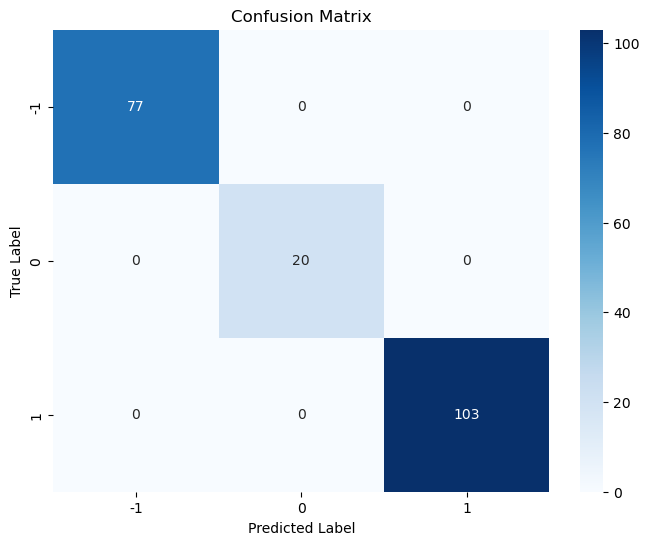

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
cm_lg = confusion_matrix(y_test, y_pred)

# Plotting the Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lg, annot=True, fmt="d", cmap="Blues", xticklabels=[-1,0,1], yticklabels=[-1,0,1])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

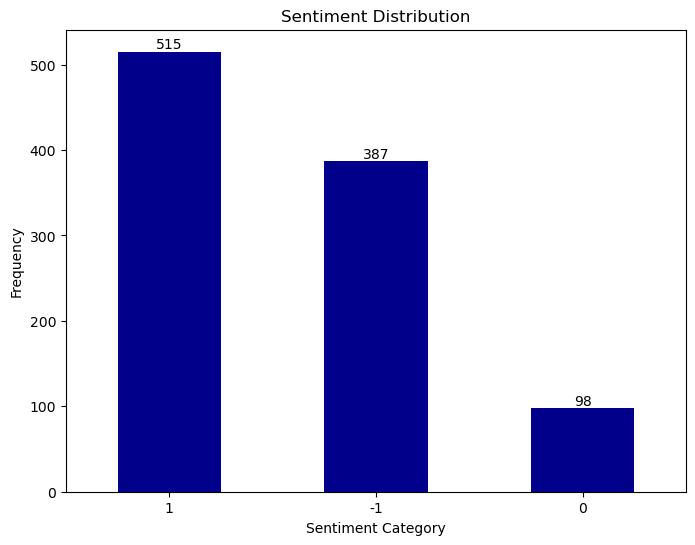

In [49]:
# y contains sentiment labels
sentiment_distribution = y.value_counts()

# Plot the distribution before SMOTE
plt.figure(figsize=(8, 6))
ax = sentiment_distribution.plot(kind='bar', color='darkblue')

# Add frequency values on top of each bar
for i, v in enumerate(sentiment_distribution):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')

plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Category')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

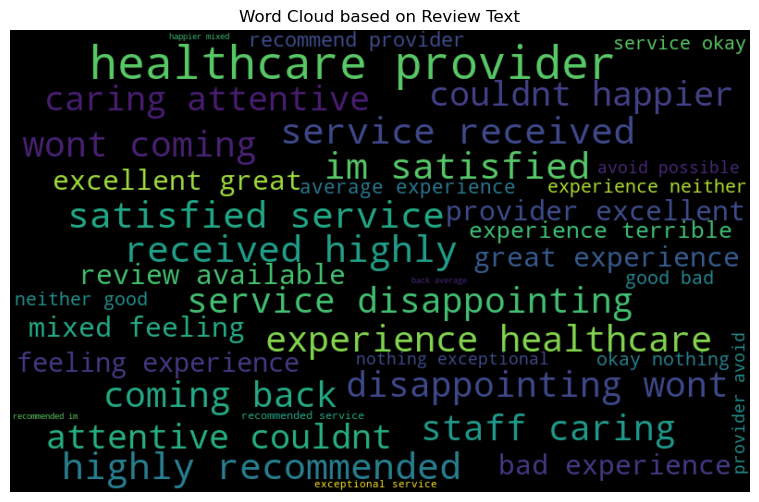

In [50]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 'Review_Text_lemma' is the column containing lists of words
# Convert lists to strings
df['Review_Text_lemma_str'] = df['Review_Text_lemma'].apply(lambda x: ' '.join(map(str, x)))

# Concatenate all the strings into one
all_words = " ".join(df['Review_Text_lemma_str'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=50, background_color='black').generate(all_words)

# Plotting the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud based on Review Text')
plt.show()

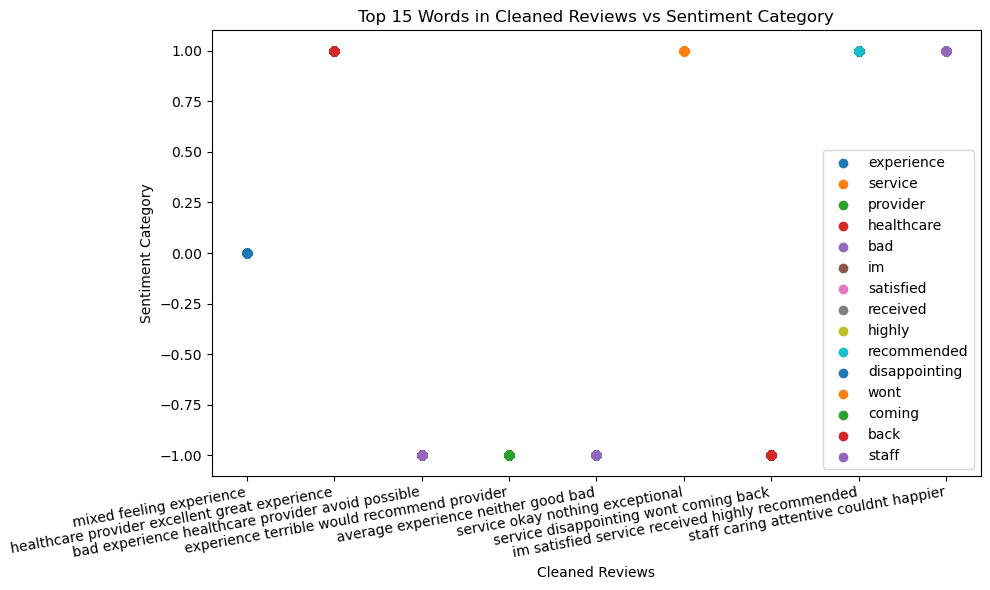

In [91]:
from collections import Counter

# Split sentences into words
all_words = [word for review in df['Cleaned_Reviews'] for word in review.split()]

# Count word frequencies
word_freq = Counter(all_words)

# Get the top 15 words
top_15_words = dict(word_freq.most_common(15))

# the top 15 words
df_top_15 = df[df['Cleaned_Reviews'].str.split().apply(lambda x: any(word in top_15_words for word in x))]

# Plot scatter plot
plt.figure(figsize=(10, 6))
for word in top_15_words:
    plt.scatter(df_top_15[df_top_15['Cleaned_Reviews'].str.contains(word)]['Cleaned_Reviews'],
                df_top_15[df_top_15['Cleaned_Reviews'].str.contains(word)]['Sentiment_Category'],
                label=word)

plt.xlabel('Cleaned Reviews')
plt.ylabel('Sentiment Category')
plt.title('Top 15 Words in Cleaned Reviews vs Sentiment Category')
plt.legend()
plt.xticks(rotation=10, ha='right')
plt.tight_layout()
plt.show()

In [51]:
df.head()

,Review_Text,Rating,Review_Text_lemma,Review_Text_stem,Cleaned_Reviews,Review_Text_postag,Sentiment_Polarity,Sentiment_Category,Review_Text_lemma_str
0,"[mixed, feelings, experience]",4,"[mixed, feeling, experience]","[mix, feel, experi]",mixed feeling experience,"[(mixed, JJ), (feelings, NNS), (experience, NN)]",0.0,0,mixed feeling experience
1,"[staff, caring, attentive, couldnt, happier]",5,"[staff, caring, attentive, couldnt, happier]","[staff, care, attent, couldnt, happier]",staff caring attentive couldnt happier,"[(staff, NN), (caring, VBG), (attentive, JJ), ...",0.4,1,staff caring attentive couldnt happier
2,"[mixed, feelings, experience]",5,"[mixed, feeling, experience]","[mix, feel, experi]",mixed feeling experience,"[(mixed, JJ), (feelings, NNS), (experience, NN)]",0.0,0,mixed feeling experience
3,"[mixed, feelings, experience]",5,"[mixed, feeling, experience]","[mix, feel, experi]",mixed feeling experience,"[(mixed, JJ), (feelings, NNS), (experience, NN)]",0.0,0,mixed feeling experience
4,"[healthcare, provider, excellent, great, exper...",3,"[healthcare, provider, excellent, great, exper...","[healthcar, provid, excel, great, experi]",healthcare provider excellent great experience,"[(healthcare, NN), (provider, NN), (excellent,...",0.9,1,healthcare provider excellent great experience


In [52]:
from collections import Counter
# Count word frequencies
word_freq = Counter([word for tokens in df['Review_Text_lemma'] for word in tokens])

# top 10 recurring words
top_10_words = word_freq.most_common(10)

# Print the results
print("Top 10 Recurring Words:")
for word, count in top_10_words:
    print(f"{word}")

Top 10 Recurring Words:
experience
service
provider
healthcare
bad
im
satisfied
received
highly
recommended


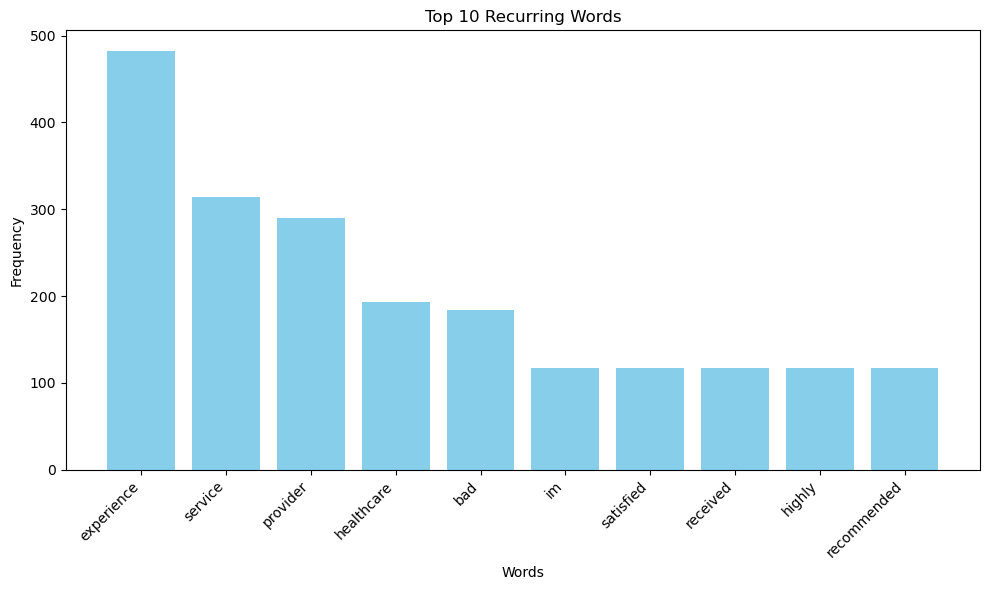

In [69]:
from collections import Counter

# Count word frequencies
word_freq = Counter([word for tokens in df['Review_Text_lemma'] for word in tokens])

# Extract top 10 recurring words and their frequencies
top_10_words = word_freq.most_common(10)
words, frequencies = zip(*top_10_words)


plt.figure(figsize=(10, 6))
plt.bar(words, frequencies, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Recurring Words')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()


In [53]:
# df[df.Sentiment_Category >1]


In [54]:
# df.to_csv('Sentiment_Category.csv')

In [55]:
x=df['Cleaned_Reviews'].values
y=df['Sentiment_Category'].values

In [56]:
from sklearn.feature_extraction.text import CountVectorizer

countvectorizer = CountVectorizer()

x_cv = countvectorizer.fit_transform(x)

In [57]:
dataset_analysis = pd.DataFrame(x_cv.toarray(), columns=countvectorizer.get_feature_names_out())
dataset_analysis['Sentiment_Category']=y


In [58]:
dataset_analysis.shape

(1000, 37)

In [59]:
# Assuming 'dataset_analysis' is your DataFrame
# Replace 'filename.csv' with the desired filename

# dataset_analysis.to_csv('Dataset.csv', index=False)


In [60]:
# dataset_analysis.to_csv('Dataset.csv')


In [61]:
dataset_analysis

,attentive,available,average,avoid,back,bad,caring,coming,couldnt,disappointing,...,recommend,recommended,review,satisfied,service,staff,terrible,wont,would,Sentiment_Category
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,-1
996,0,0,0,0,1,0,0,1,0,1,...,0,0,0,0,1,0,0,1,0,-1
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
#Postive 

df_pos=dataset_analysis.query("Sentiment_Category==1")
positive_df=pd.DataFrame()
positive_df['Words']=list(df_pos.iloc[:, :-1].columns)
positive_df['Frequency']=df_pos.iloc[:, :-1].sum().values
positive_df = positive_df.sort_values(by='Frequency',ascending=False)
positive_df.head()


,Words,Frequency
31,service,208
18,highly,117
30,satisfied,117
28,recommended,117
26,received,117


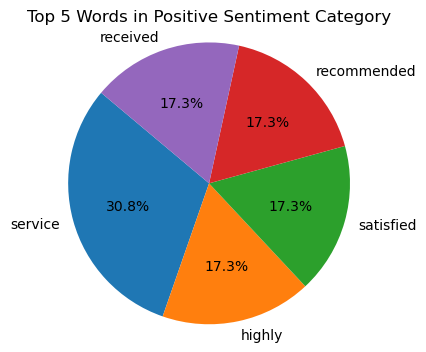

In [86]:
# Assuming positive_df contains the data for positive sentiment category
# If not, replace positive_df with your DataFrame containing the words and their frequencies

# Extracting top 5 words and their frequencies for the pie chart
top_5_words = positive_df.head()

# Plotting the pie chart
plt.figure(figsize=(4, 4))
plt.pie(top_5_words['Frequency'], labels=top_5_words['Words'], autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Words in Positive Sentiment Category')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [63]:
#Negative

df_neg=dataset_analysis.query("Sentiment_Category==-1")
negative_df=pd.DataFrame()
negative_df['Words']=list(df_neg.iloc[:, :-1].columns)
negative_df['Frequency']=df_neg.iloc[:, :-1].sum().values
negative_df = negative_df.sort_values(by='Frequency',ascending=False)
negative_df.head()

,Words,Frequency
12,experience,281
25,provider,187
5,bad,184
31,service,106
9,disappointing,106


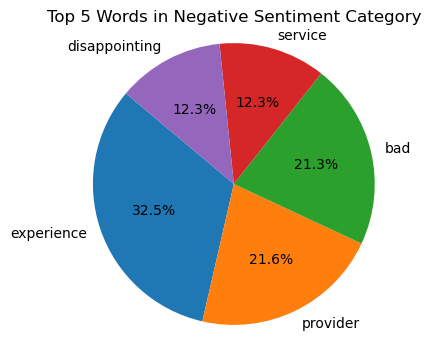

In [87]:
top_5_words = negative_df.head()

# Plotting the pie chart
plt.figure(figsize=(4, 4))
plt.pie(top_5_words['Frequency'], labels=top_5_words['Words'], autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Words in Negative Sentiment Category')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [64]:
#Netural

df_neu=dataset_analysis.query("Sentiment_Category==0")
neutral_df=pd.DataFrame()
neutral_df['Words']=list(df_neu.iloc[:, :-1].columns)
neutral_df['Frequency']=df_neu.iloc[:, :-1].sum().values
neutral_df = negative_df.sort_values(by='Frequency',ascending=False)
neutral_df.head()

,Words,Frequency
12,experience,281
25,provider,187
5,bad,184
31,service,106
9,disappointing,106


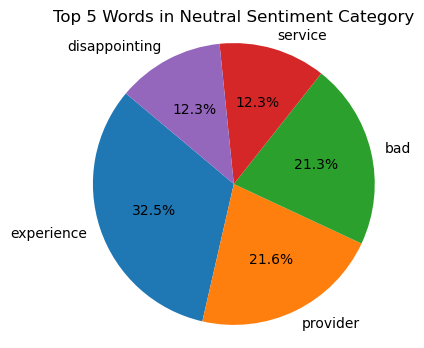

In [88]:
top_5_words = neutral_df.head()

# Plotting the pie chart
plt.figure(figsize=(4, 4))
plt.pie(top_5_words['Frequency'], labels=top_5_words['Words'], autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Words in Neutral Sentiment Category')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Insights 

Training Data
-The models have achieved perfect accuracy on the training set, as evidenced by the training accuracy of 1.00.
-The classification report and confusion matrix suggest that the model is making correct predictions for each class, with precision, recall, and F1-score all equal to 1.00

Testing Data
-The model achieved perfect accuracy on the test set, which aligns with the results on the training set.
-The classification report and confusion matrix suggest that the model is making correct predictions for each class, with precision, recall, and F1-score all equal to 1.00.

Cross-Validation of Models

-All individual cross-validation accuracy scores on the training and testing data are 1.0 (100%). This suggests that, in each fold, the model achieved perfect accuracy on the training and testing data.

-The mean accuracy on the training and testing data is also 1.0, indicating that the model consistently performed well across different subsets of the training and testing data during cross-validation

Positive Reviews : Customers are highly satisfied and recommend the service.

Negative Reviews : Customers had a bad, disappointing experience and service.

Neutral Reviews : Customers had a bad, disappointing experience and service.

